In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
# Obtendo o diretório atual do Jupyter Notebook
caminho_script = "\\".join(os.getcwd().split("\\")[:-1])
print("Caminho do diretório atual:", caminho_script)
# Adicionando o diretório ao sys.path se precisar importar módulos
sys.path.append(caminho_script)

from classes.dados.dados import DataHandler as dh
from classes.dados.GaussianData import GausianDataHandler as gdh
from classes.dados.monteCarlo import MonteCarlo as MC
from classes.modelos.GausianCov import GaussianCovModel as GCM
from classes.modelos.GausianTrad import GausianTraditionalModel as GTM

Caminho do diretório atual: c:\Users\henri\Documents\pythonProjcs\cadeira_IA_cirilo\av2\Classificacao


In [2]:
# plotar dados para cada classe
dados = dh("EMGsDataset.csv").dados

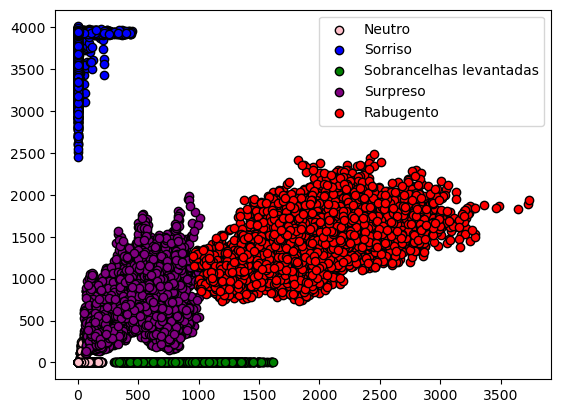

In [3]:
# classe 1
plt.scatter(dados[dados[:,2] == 1, 0], dados[dados[:,2] == 1, 1], color = "pink", edgecolors="k", label = "Neutro")
plt.scatter(dados[dados[:,2] == 2, 0], dados[dados[:,2] == 2, 1], color = "blue", edgecolors="k", label='Sorriso')
plt.scatter(dados[dados[:,2] == 3, 0], dados[dados[:,2] == 3, 1], color = "green", edgecolors="k", label='Sobrancelhas levantadas')
plt.scatter(dados[dados[:,2] == 4, 0], dados[dados[:,2] == 4, 1], color = "purple", edgecolors="k", label='Surpreso')
plt.scatter(dados[dados[:,2] == 5, 0], dados[dados[:,2] == 5, 1], color = "r", edgecolors="k", label='Rabugento')
plt.legend()
plt.show()

In [9]:
gausianData = gdh("EMGsDataset.csv")
x, y = gausianData.x, gausianData.y

x, y = x.T, y.T
# separar dados
x_treino, y_treino, x_test, y_test = MC.partition(x, y)
x_treino, y_treino, x_test, y_test = x_treino.T, y_treino.T, x_test.T, y_test.T

In [11]:
for i in [x_treino, y_treino, x_test, y_test]:
    print(i)

[[1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.990e+03 0.000e+00 0.000e+00 ... 1.438e+03 9.860e+02 0.000e+00]
 [1.803e+03 3.929e+03 0.000e+00 ... 1.206e+03 0.000e+00 0.000e+00]]
[[5. 2. 1. ... 5. 3. 1.]]
[[1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [1.600e+01 1.876e+03 0.000e+00 ... 9.630e+02 0.000e+00 1.168e+03]
 [3.952e+03 1.245e+03 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]]
[[2. 5. 1. ... 3. 1. 3.]]


In [12]:
model = GTM(x_treino, y_treino, np.array([1,2,3,4,5]))

In [13]:
" pegar dadados da classe 2"
model.getStatistcs()

x_2 = model.separeted_matrix[2]["x"]
mean2 = model.statics[2]["mean"]
cov2 = model.statics[2]["cov"]

In [16]:
print(x_2)
print(mean2)
print(cov2)


[[1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 ... 1.060e+02 0.000e+00 0.000e+00]
 [3.929e+03 3.935e+03 3.462e+03 ... 3.934e+03 3.941e+03 3.941e+03]]
[[1.00000000e+00]
 [1.19204374e+01]
 [3.89696820e+03]]
[[    0.             0.             0.        ]
 [    0.          2436.61805618   372.64926093]
 [    0.           372.64926093 26234.15147135]]


In [15]:
print(model.descriminante(x_test, mean2, cov2))

c:\Users\henri\Documents\pythonProjcs\cadeira_IA_cirilo\av2\Classificacao\classes\modelos\GausianTrad.py:56: RuntimeWarning: divide by zero encountered in log
  termo_1 = -0.5 * np.log(det_cov)


[[inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 ...
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]
 [inf inf inf ... inf inf inf]]
